In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

num_species = 10
num_gens = 24

fitness = []

for spec in range(num_species):
    for gen in range(num_gens + 1):
        with open(f"phenotypes/pheno-gen-{gen}-species-{spec}.json") as f:
            pheno = json.load(f)
            fitness.append(pheno)
        

In [2]:
import pandas as pd
df = pd.DataFrame(fitness)
cols = df.columns.drop(["sense_hist", "leg_hist"])
df[cols] = df[cols].apply(pd.to_numeric)
df

,species,gen,x,y,z,fitness,sense_hist,leg_hist
0,0,0,-0.491357,-3.439563,0.929603,40,"[0.0, 4.0, 4.0, 4.0, 4.0, -2.0, 4.0, 4.0, 4.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
1,0,1,0.078743,-2.843177,1.107237,69,"[0.0, 4.0, 4.0, 4.0, 4.0, -2.0, 4.0, 4.0, 4.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
2,0,2,0.212903,-2.253168,1.049986,45,"[0.0, 4.0, 4.0, 4.0, 4.0, -2.0, 4.0, 4.0, 4.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
3,0,3,0.116988,-2.182063,1.035935,40,"[0.0, 4.0, 4.0, 4.0, 4.0, -2.0, 4.0, 4.0, 4.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
4,0,4,-1.142953,-2.612434,1.122777,44,"[0.0, 4.0, 4.0, 4.0, 4.0, -2.0, 4.0, 4.0, 4.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
...,...,...,...,...,...,...,...,...
245,9,20,-0.686455,0.654487,1.249105,67,"[0.0, 4.0, 4.0, 4.0, 4.0, 2.0, -2.0, 2.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
246,9,21,-1.535391,-0.004106,0.951164,121,"[0.0, 4.0, 4.0, 2.0, 0.0, 0.0, -2.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
247,9,22,-3.089607,0.852961,1.271684,104,"[0.0, 4.0, 4.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
248,9,23,-0.307011,-5.215425,1.108813,68,"[0.0, 4.0, 4.0, 4.0, 4.0, 2.0, 0.0, 2.0, 2.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."


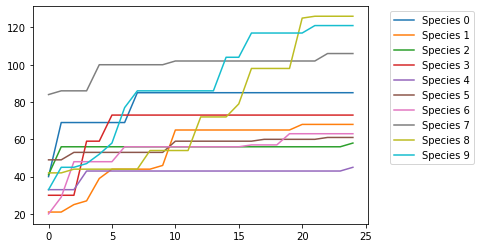

In [3]:
# df[df.species == 3][["fitness", "gen"]].plot(x="gen", y="fitness")
for i in range(num_species):
    arr = df[df.species == i][["gen","fitness"]].to_numpy()
    arr = np.maximum.accumulate(arr, axis=0)
    plt.plot(arr[:,0], arr[:,1], label=f"Species {i}")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

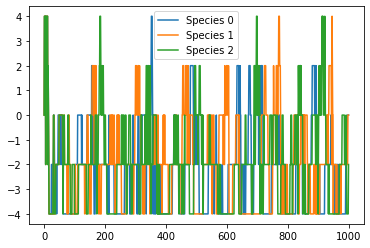

In [4]:
for i in range(3):
    plt.plot(fitness[i]["sense_hist"], label=f"Species {i}")
plt.legend()
plt.show()

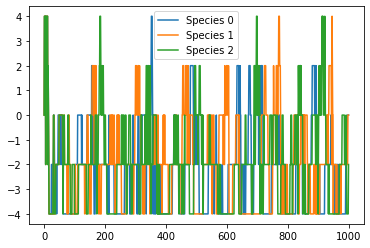

In [5]:
for i in range(3):
    plt.plot(fitness[i]["sense_hist"], label=f"Species {i}")
plt.legend()
plt.show()

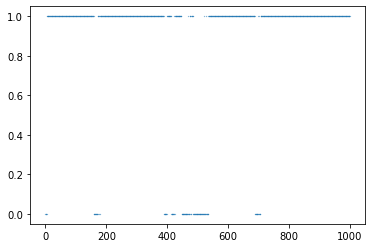

In [53]:
lh = np.asarray(df["leg_hist"][246])
mask = lh[:,0] == -1

foot_down = np.zeros(mask.shape)
# mask
foot_down[mask] = 1
plt.scatter(np.arange(0, len(mask)), foot_down, s=0.05)

In [65]:
mask = df[["species", "gen", "leg_hist", "fitness"]].fitness > 100
df[mask]

,species,gen,x,y,z,fitness,sense_hist,leg_hist
185,7,10,1.046822,-3.560372,1.133445,102,"[0.0, 4.0, 4.0, 4.0, 4.0, -2.0, 4.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
189,7,14,0.839870,-3.567156,0.739772,102,"[0.0, 4.0, 4.0, 4.0, 4.0, -2.0, 4.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
197,7,22,0.757142,-4.562318,1.038939,106,"[0.0, 4.0, 4.0, 4.0, 4.0, -2.0, 4.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
220,8,20,0.309042,-1.224654,1.012480,125,"[0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 4.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
221,8,21,-0.066674,-1.412633,1.196910,126,"[0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 4.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
222,8,22,0.019872,-0.180329,0.885861,124,"[0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 4.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
223,8,23,0.301967,-0.358596,0.858324,123,"[0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 4.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
239,9,14,-2.044295,-0.384277,1.582458,104,"[0.0, 4.0, 4.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
241,9,16,-2.126623,-0.629079,1.328345,117,"[0.0, 4.0, 4.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."
242,9,17,-2.328527,-1.260672,1.438909,113,"[0.0, 4.0, 4.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [..."


TypeError: Invalid shape (1000,) for image data

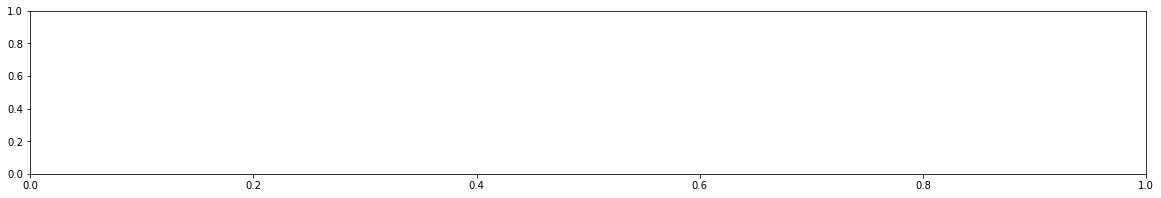

In [80]:
plt.rcParams["figure.figsize"] = (20,3)

for idx in [101,110,118,123, 244,246]:
    lh = np.asarray(df["sense_hist"][idx]).T
    data = lh > 0
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    data.reshape((1000, 1))
    ax.imshow(data, aspect='auto', cmap="binary", interpolation='nearest')

    plt.show()